In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Getting Cifar10 dataset and spliting it in train,test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
################# Parameters #####################

# folder with all the class folders
path = "D:\Machine Learning Projects\CNN notebooks\myData"
# file with all names of classes
labelFile = 'D:\Machine Learning Projects\CNN notebooks\labels.csv'
batch_size_val = 8  # how many to process together
steps_per_epoch_val = 2000
epochs_val = 20
imageDimesions = (256, 256, 3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################


# Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg = cv2.resize(curImg, (256, 256), interpolation=cv2.INTER_AREA)
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

# TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train", end="")
print(X_train.shape, y_train.shape)
print("Validation", end="")
print(X_validation.shape, y_validation.shape)
print("Test", end="")
print(X_test.shape, y_test.shape)
assert (X_train.shape[0] == y_train.shape[0]
        ), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0] == y_validation.shape[0]
        ), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0] == y_test.shape[0]
        ), "The number of images in not equal to the number of lables in test set"
assert (X_train.shape[1:] == (imageDimesions)
        ), " The dimesions of the Training images are wrong "
assert (X_validation.shape[1:] == (imageDimesions)
        ), " The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:] == (imageDimesions)
        ), " The dimesionas of the Test images are wrong"


# READ CSV FILE
data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))


# PREPROCESSING THE IMAGES


def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img


# TO IRETATE AND PREPROCESS ALL IMAGES
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
# TO CHECK IF THE TRAINING IS DONE PROPERLY

# ADD A DEPTH OF 1
X_train = X_train.reshape(
    X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(
    X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


# AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen = ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10,
                             )  # DEGREES
dataGen.fit(X_train)
# REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)





Total Classes Detected: 3
Importing Classes.....
0 1 2  
Data Shapes
Train(92, 256, 256, 3) (92,)
Validation(24, 256, 256, 3) (24,)
Test(29, 256, 256, 3) (29,)
data shape  (3, 2) <class 'pandas.core.frame.DataFrame'>


In [2]:
X_train

array([[[[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.89019608],
         [0.8627451 ],
         [0.8627451 ]],

        [[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.89019608],
         [0.83137255],
         [0.83137255]],

        [[0.98039216],
         [0.98039216],
         [0.99215686],
         ...,
         [0.8627451 ],
         [0.8       ],
         [0.78823529]],

        ...,

        [[0.16470588],
         [0.16078431],
         [0.16862745],
         ...,
         [0.63137255],
         [0.60784314],
         [0.6       ]],

        [[0.16470588],
         [0.18039216],
         [0.18431373],
         ...,
         [0.64313725],
         [0.61176471],
         [0.58823529]],

        [[0.16470588],
         [0.16470588],
         [0.17647059],
         ...,
         [0.63921569],
         [0.61568627],
         [0.58431373]]],


       [[[0.47058824],
         [0.46666667],
         [0.43

In [4]:
# (X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
# X_train.shape
print(y_train)

[2 0 1 1 1 1 1 0 2 2 2 1 2 2 0 1 0 0 2 1 0 1 2 1 0 0 0 1 1 0 1 2 2 1 2 1 2
 1 2 1 0 2 0 0 0 2 0 0 1 0 2 0 2 2 2 0 2 2 0 2 1 2 0 1 1 2 1 2 2 0 2 1 0 2
 2 2 2 0 1 0 0 2 2 2 2 0 1 0 1 0 0 0]


### Making into 1-D array...

In [19]:
y_train =  y_train.reshape(-1,)

In [5]:

# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]



In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

TypeError: list indices must be integers or slices, not numpy.float32

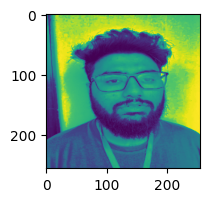

In [6]:
plot_sample(X_train, y_train, 1)

#### Normalizing values btw 0-1 of all pixels

In [7]:
X_train=X_train/255
X_test = X_test/255

### Applying DNN on CIFAR10

In [ ]:
ann = models.Sequential([

   

        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

### Checking accuracy on test dataset

In [ ]:
ann.evaluate(X_test,y_test)

#### check accuracy of each class

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [20]:
print(y_train)

[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.]


#### Applying CNN on CIFAR10 CNN = ( C + NN )

In [6]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,1)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

         layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 2.4640 - accuracy: 0.2500
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.3752 - accuracy: 0.4457
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.9047 - accuracy: 0.6630
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.6829 - accuracy: 0.6957
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.3630 - accuracy: 0.9130
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.1635 - accuracy: 0.9565
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.0380 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 5s 2s/step - loss: 0.0175 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 5s 2s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 5s 2s/step - loss: 5.1606e-04 - accuracy: 1.0000


#### Ohh we forget to flatten test array

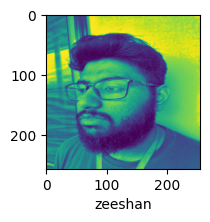

In [32]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,15)

predictions of all classes 

In [7]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 1s 520ms/step - loss: 0.0470 - accuracy: 0.9655


[0.0470069982111454, 0.9655172228813171]

[[[[0.83921569]
   [0.83921569]
   [0.76470588]
   ...
   [0.86666667]
   [0.83921569]
   [0.7372549 ]]

  [[0.76470588]
   [0.76470588]
   [0.76470588]
   ...
   [0.86666667]
   [0.79607843]
   [0.7372549 ]]

  [[0.7372549 ]
   [0.7372549 ]
   [0.76470588]
   ...
   [0.83921569]
   [0.7372549 ]
   [0.70588235]]

  ...

  [[0.21568627]
   [0.14509804]
   [0.13333333]
   ...
   [0.28627451]
   [0.11764706]
   [0.08627451]]

  [[0.17254902]
   [0.1372549 ]
   [0.1254902 ]
   ...
   [0.21568627]
   [0.10196078]
   [0.10588235]]

  [[0.16470588]
   [0.12941176]
   [0.12156863]
   ...
   [0.21568627]
   [0.08627451]
   [0.1254902 ]]]


 [[[0.32941176]
   [0.3372549 ]
   [0.3254902 ]
   ...
   [0.90196078]
   [0.87058824]
   [0.84313725]]

  [[0.34509804]
   [0.34509804]
   [0.32941176]
   ...
   [0.90196078]
   [0.84313725]
   [0.81568627]]

  [[0.36078431]
   [0.36078431]
   [0.37254902]
   ...
   [0.87058824]
   [0.81568627]
   [0.77647059]]

  ...

  [[1.        ]
   [1.        ]
   [1. 

In [53]:
x=5
y_pred = cnn.predict(tf.expand_dims(X_test[x],0))
print(np.argmax(y_pred),y_test[x])


1/1 [==============================] - 0s 87ms/step
1 1


getting max value index from "Y_PRED" and in classname getting name of the object from index we got from above

In [27]:
y_classes =[np.argmax(element) for element in y_pred]
classname = [classes[element] for element in y_classes]

#### Verify manually, if prediction and ground truth is same

In [28]:
y_classes[:10]    #prediction

[0, 2, 2, 1, 1, 1, 1, 2, 0, 1]

In [29]:
y_test[:10]      #ground truth

array([0, 2, 2, 1, 1, 1, 1, 2, 0, 1])

1/1 [==============================] - 0s 81ms/step
[[9.9994731e-01 5.1394785e-05 1.3104119e-06 9.5883355e-17 8.2472079e-24
  4.7690662e-21 5.7656802e-23 3.3447912e-18 2.7252277e-24 4.5026853e-22]]


In [98]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img


def getCalssName(classNo):
    if classNo == 0:
        return 'ozaifa'
    elif classNo == 1:
        return 'Khubaib'
    elif classNo == 2:
        return 'zeeshan'


imgOrignal = cv2.imread(
    r"C:\Users\Administrator\Downloads\WhatsApp Image 2023-03-29 at 5.29.35 PM.jpeg")

# PROCESS IMAGE
img = np.asarray(imgOrignal)
img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
img = preprocessing(img)
cv2.imshow("Processed Image", img)
img = img.reshape(1, 256, 256, 1)

1/1 [==============================] - 0s 98ms/step
ozaifa 0.9967986


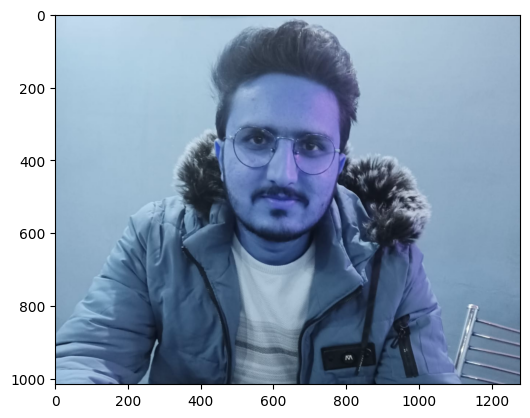

: 

In [99]:
y_pred = cnn.predict(img)
print(classes[np.argmax(y_pred)],np.amax(y_pred))
plt.imshow(cv2.imread(r"C:\Users\Administrator\Downloads\WhatsApp Image 2023-03-29 at 5.29.35 PM.jpeg"))

In [ ]:
print(y_pred[:5])